<a href="https://colab.research.google.com/github/monsegutier/Grupo4-PP1--Proyecto-ML/blob/Naive-Bayes/NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/heart.csv")

In [3]:
df.head()

,Edad,Genero,Dolor en pecho,Presión arterial reposo,Colesterol,Glucemia,Resultado ECC Reposo,Frecuencia Cardiaca,Angina por ejercicio,Depresión de ST,Pendiente ST,Numero de vasos,Talasemia,Diagnostico
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.describe()

,Edad,Genero,Dolor en pecho,Presión arterial reposo,Colesterol,Glucemia,Resultado ECC Reposo,Frecuencia Cardiaca,Angina por ejercicio,Depresión de ST,Pendiente ST,Numero de vasos,Talasemia,Diagnostico
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Edad                     303 non-null    int64  
 1   Genero                   303 non-null    int64  
 2   Dolor en pecho           303 non-null    int64  
 3   Presión arterial reposo  303 non-null    int64  
 4   Colesterol               303 non-null    int64  
 5   Glucemia                 303 non-null    int64  
 6   Resultado ECC Reposo     303 non-null    int64  
 7   Frecuencia Cardiaca      303 non-null    int64  
 8   Angina por ejercicio     303 non-null    int64  
 9   Depresión de ST          303 non-null    float64
 10  Pendiente ST             303 non-null    int64  
 11  Numero de vasos          303 non-null    int64  
 12  Talasemia                303 non-null    int64  
 13  Diagnostico              303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [6]:
df.shape



(303, 14)

In [7]:
df.columns

Index(['Edad', 'Genero', 'Dolor en pecho', 'Presión arterial reposo',
       'Colesterol', 'Glucemia', 'Resultado ECC Reposo', 'Frecuencia Cardiaca',
       'Angina por ejercicio', 'Depresión de ST', 'Pendiente ST',
       'Numero de vasos', 'Talasemia', 'Diagnostico'],
      dtype='object')

In [8]:
# verificación de valores nulos
df.isnull().sum()

Edad                       0
Genero                     0
Dolor en pecho             0
Presión arterial reposo    0
Colesterol                 0
Glucemia                   0
Resultado ECC Reposo       0
Frecuencia Cardiaca        0
Angina por ejercicio       0
Depresión de ST            0
Pendiente ST               0
Numero de vasos            0
Talasemia                  0
Diagnostico                0
dtype: int64

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

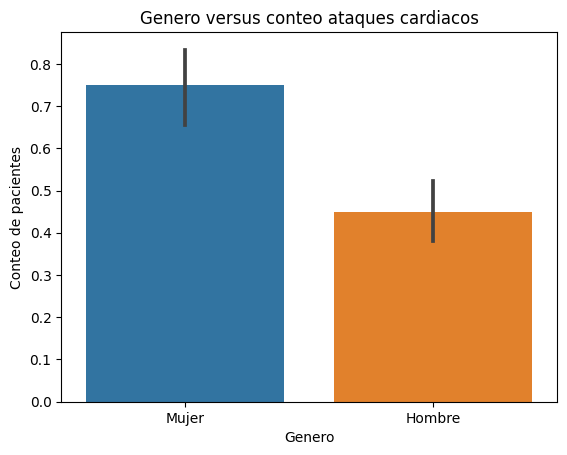

In [48]:
# Sex vs Heart Attack
ax = sns.barplot(x = 'Genero',y = 'Diagnostico',data = df)
ax.set(xlabel='Genero', ylabel='Conteo de pacientes', title='Genero versus conteo ataques cardiacos')
ax.set_xticklabels(['Mujer', 'Hombre'])
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [12]:
# X contendrá las características y y contendrá la variable objetivo que se utilizará para entrenar
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [13]:
# dividir X e y en sets de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# comprobación de  X_train y X_test
X_train.shape, X_test.shape

((242, 13), (61, 13))

In [14]:
# Se decide usar standar scaler por el tipo de data set que no contiene outliers
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


Los clasificadores Naive Bayes se basan en el Teorema de Bayes, uno de cuyos supuestos es la fuerte independencia entre las características. Asumen que el valor de una característica particular es independiente del valor de cualquier otra característica. Los clasificadores Bayes ingenuos necesitan pocos datos de entrenamiento para estimar los parámetros necesarios para la clasificación.


In [37]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [38]:
#puntuación de precisión del modelo
accuracy = metrics.accuracy_score(y_test, y_pred)*100
print("Accuracy:", ("%.2f" % accuracy), "%")

Accuracy: 88.52 %


 De todas las muestras que el modelo ha intentado clasificar, el 88.52% de ellas fueron clasificadas correctamente.

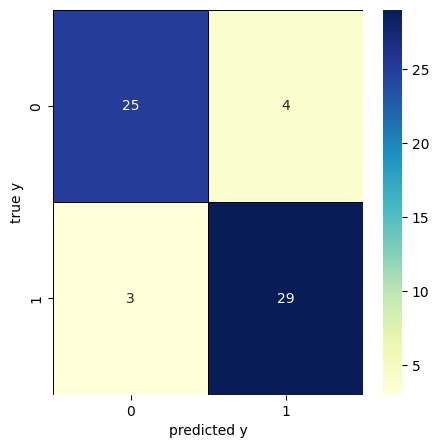

In [40]:
#Matriz de confusión:

y_head = nb_model.predict(X_test)
y_true = y_test
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_head)


f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=0.5, linecolor="Black", fmt=".0f", ax=ax,cmap='YlGnBu')
plt.xlabel("predicted y")
plt.ylabel("true y")
plt.show()

 Verdaderos Positivos (TP): Las instancias que el modelo predijo correctamente como positivas (enfermedad cardíaca) y que realmente son positivas. - Verdaderos Negativos (TN): Las instancias que el modelo predijo correctamente como negativas (sin enfermedad cardíaca) y que realmente son negativas. - Falsos Positivos (FP): Las instancias que el modelo predijo incorrectamente como positivas (enfermedad cardíaca) pero que en realidad son negativas. - Falsos Negativos (FN): Las instancias que el modelo predijo incorrectamente como negativas (sin enfermedad cardíaca) pero que en realidad son positivas

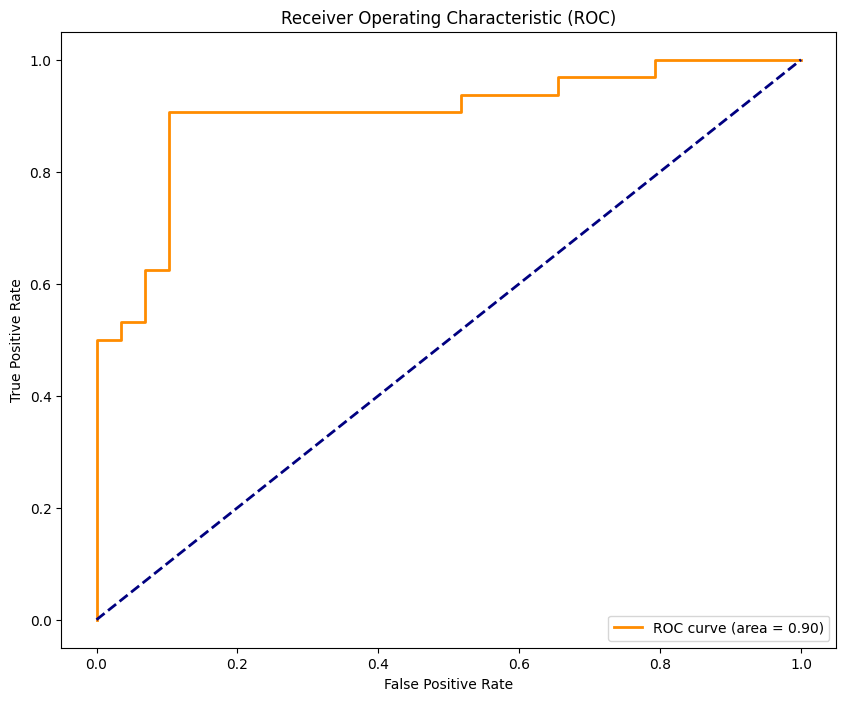

In [44]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_score =  nb_model.predict_proba(X_test)[:,1]  # Probabilidades de la clase positiva

fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


#permite evaluar la precisión de las predicciones de modelo al trazar la sensibilidad frente a la especificidad de una prueba de clasificación

La curva ROC es una representación gráfica que muestra cómo cambia la tasa de verdaderos positivos (TPR) en función de la tasa de falsos positivos (FPR) al variar el umbral de decisión del modelo. TPR se refiere a la proporción de verdaderos positivos con respecto a todos los casos positivos reales, y FPR se refiere a la proporción de falsos positivos con respecto a todos los casos negativos reales

In [33]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)

print(f'Precisión del modelo: {accuracy * 100:.2f}%')


Precisión del modelo: 88.52%


 En el caso de GaussianNB, no hay hiperparámetros para ajustar.La búsqueda en cuadrícula no se aplica directamente a modelos de Naive Bayes porque estos modelos tienen hiperparámetros muy simples o incluso no tienen hiperparámetros que requieran ajuste en el mismo sentido que otros algoritmos más complejos.


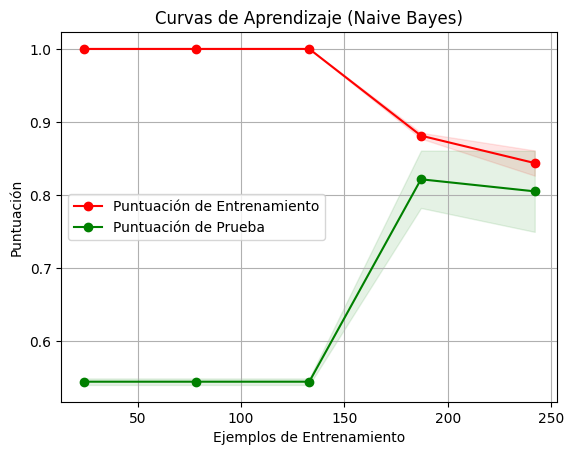

In [34]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Definir el modelo Naive Bayes
model = GaussianNB()

# Crear una función para graficar las curvas de aprendizaje
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Ejemplos de Entrenamiento")
    plt.ylabel("Puntuación")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Puntuación de Entrenamiento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Puntuación de Prueba")

    plt.legend(loc="best")
    return plt

# Llamar a la función para generar las curvas de aprendizaje
title = "Curvas de Aprendizaje (Naive Bayes)"
plot_learning_curve(model, title, X, y, cv=5, n_jobs=-1)

plt.show()


In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# Definir el modelo de Naive Bayes
nb_model = GaussianNB()

# Realizar validación cruzada
cv_scores = cross_val_score(nb_model, X, y, cv=5, scoring='accuracy')

# Imprimir los puntajes de validación cruzada
print("Puntajes de Validación Cruzada:", cv_scores)

# Calcular la media de los puntajes
mean_cv_score = np.mean(cv_scores)
print(f"Puntaje de Validación Cruzada Promedio: {mean_cv_score:.2f}")


Puntajes de Validación Cruzada: [0.80327869 0.8852459  0.78688525 0.83333333 0.71666667]
Puntaje de Validación Cruzada Promedio: 0.81


In [22]:
#Selección de caracteríticas con CHi cuadrado
from sklearn.feature_selection import SelectKBest, chi2

# Definir el número de características a seleccionar
num_features = 10  # Por ejemplo, seleccionar las 10 mejores características

# Inicializar el selector de características
selector = SelectKBest(chi2, k=num_features)

# Aplicar la selección de características al conjunto de datos
X_selected = selector.fit_transform(X, y)

# Obtener los índices de las características seleccionadas
selected_indices = selector.get_support(indices=True)

# Obtener los nombres de las características seleccionadas
selected_features = [X.columns[i] for i in selected_indices]

# Imprimir las características seleccionadas
print("Características seleccionadas:")
print(selected_features)



Características seleccionadas:
['Edad', 'Genero', 'Dolor en pecho', 'Presión arterial reposo', 'Colesterol', 'Frecuencia Cardiaca', 'Angina por ejercicio', 'Depresión de ST', 'Pendiente ST', 'Numero de vasos']


La decisión de utilizar la puntuación de chi-cuadrado para la selección de características en un conjunto de datos pequeño con el modelo de Naive Bayes es una elección apropiada por varias razones:

Eficiencia Computacional: La puntuación de chi-cuadrado es una medida estadística relativamente eficiente y no requiere un proceso de entrenamiento complejo como algunos otros métodos de selección de características.

Adecuado para Conjuntos de Datos Pequeños: La puntuación de chi-cuadrado es especialmente útil en conjuntos de datos pequeños donde la complejidad de los modelos más avanzados podría llevar a un sobreajuste. Al ser una técnica relativamente simple, es menos propensa a sobreajustar el modelo.

Independencia de Características en Naive Bayes: El modelo de Naive Bayes asume independencia entre las características. La puntuación de chi-cuadrado, que mide la independencia entre dos variables, es coherente con esta suposición. Por lo tanto, es una opción lógica para seleccionar características relevantes en el contexto de Naive Bayes.

Interpretabilidad: La puntuación de chi-cuadrado proporciona una medida de la relación entre dos variables categóricas, lo que hace que sea fácil de interpretar y comprender para los usuarios.

Identificación de Características Informativas: La puntuación de chi-cuadrado destaca las características que tienen una mayor relación con la variable objetivo, lo que significa que te ayuda a identificar las características más informativas y relevantes para la clasificación.

Reducción de Dimensionalidad: Al seleccionar solo las características más relevantes, la puntuación de chi-cuadrado puede reducir la dimensionalidad del conjunto de datos, lo que a su vez puede llevar a modelos más simples y eficientes.

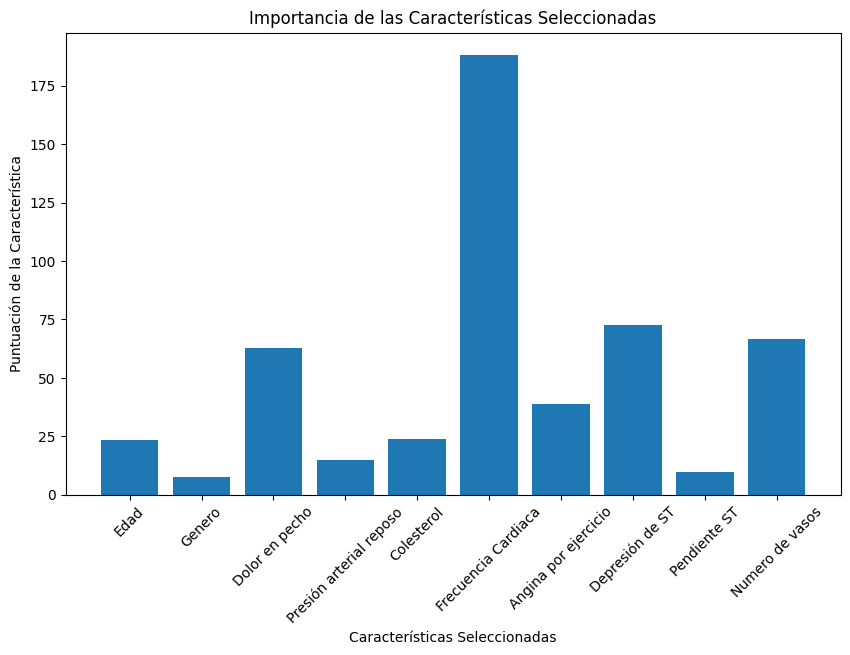

In [41]:
#Selección de características a nivel gráfico
import matplotlib.pyplot as plt


# Obtener las puntuaciones de las características seleccionadas
feature_scores = selector.scores_[selected_indices]

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(selected_features, feature_scores)
plt.xlabel('Características Seleccionadas')
plt.ylabel('Puntuación de la Característica')
plt.title('Importancia de las Características Seleccionadas')
plt.xticks(rotation=45)
plt.show()
